In [1]:
import pandas as pd
import numpy as np
from dateutil import parser
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
def drop_sparse(df, threshold):
    for col in df.columns:
        if df[col].count() < threshold:
            df.drop(col, axis=1, inplace=True)
    return None

def one_hot_encoding(df, columns):
    df = df.copy()
    for col, pref in columns.items():
        dummy = pd.get_dummies(df[col], prefix=pref)
        dummy.astype(bool)
        df = pd.concat([df, dummy], axis=1)
        df = df.drop(col, axis=1)
    return df

def time_parser_ms(t):
    try:
        t = parser.parse(t)
        t = t.time().minute*60*1000 + t.time().second*1000 + t.time().microsecond/10000
        t = int(t)
    except:
        t = np.nan
    return t

def convert_time_ms(df,time_cols):
    for col in time_cols:
        df[col] = df[col].apply(time_parser_ms)
    return None

In [4]:
horses = pd.read_csv('./data/horses2.csv')

In [5]:
horses = horses.drop(['RaceNumber','RaceName','RaceTitle','Place','HorseName','Trainer', 'Driver', 'Venue', 'DayCalender', 'HorseID',  'Placer','Colour', 'Sire', 'NumberTrainer', 'tracknamelaststart', 'TrainerLastStart','DriverLastStart','StewardsFull', 'racetime', 'Timelastrace',  'Tracklaststart','StewardsComments', 'Prizemoney','Firststarter','DistanceLastStart','Dayssincelast','Handicap', 'RaceDistance','RowLastStart','SameDistance','Standlaststart', 'Triallaststart', 'broken', 'countofdeath','downindistance', 'eveningrace', 'eveningracelaststart', 'morningrace','morningracelaststart', 'totalprize', 'upindistance' ], axis=1)

Text(0.5, 1.0, 'Sex')

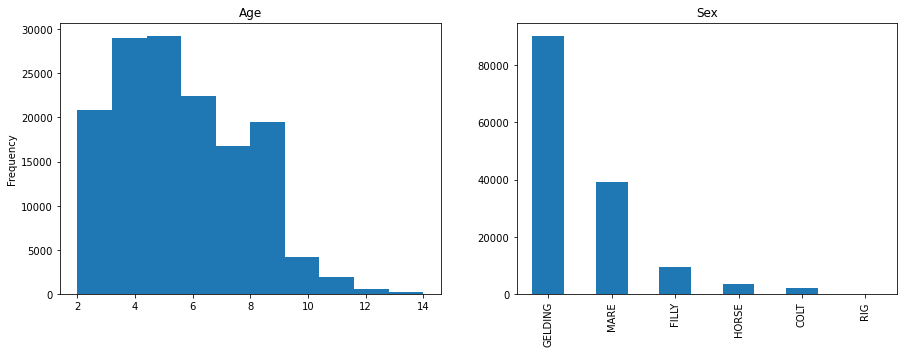

In [6]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
horses['Age'].plot.hist(ax=ax[0], bins=10)
ax[0].set_title('Age')
horses['Sex'].value_counts().plot.bar(ax=ax[1])
ax[1].set_title('Sex')

In [7]:
drop_sparse(horses, 10)
convert_time_ms(horses, ['BestWinningMile'])
horses = one_hot_encoding(horses, {'Row':'Row_','Sex': 'Sex_'})
winner = horses.pop('Winner')
horses.insert(0, 'Winner', winner)

In [8]:
mean = horses.median()
horses.fillna(mean, inplace=True)
horses.to_csv('./data/clean_data.csv', index=False)

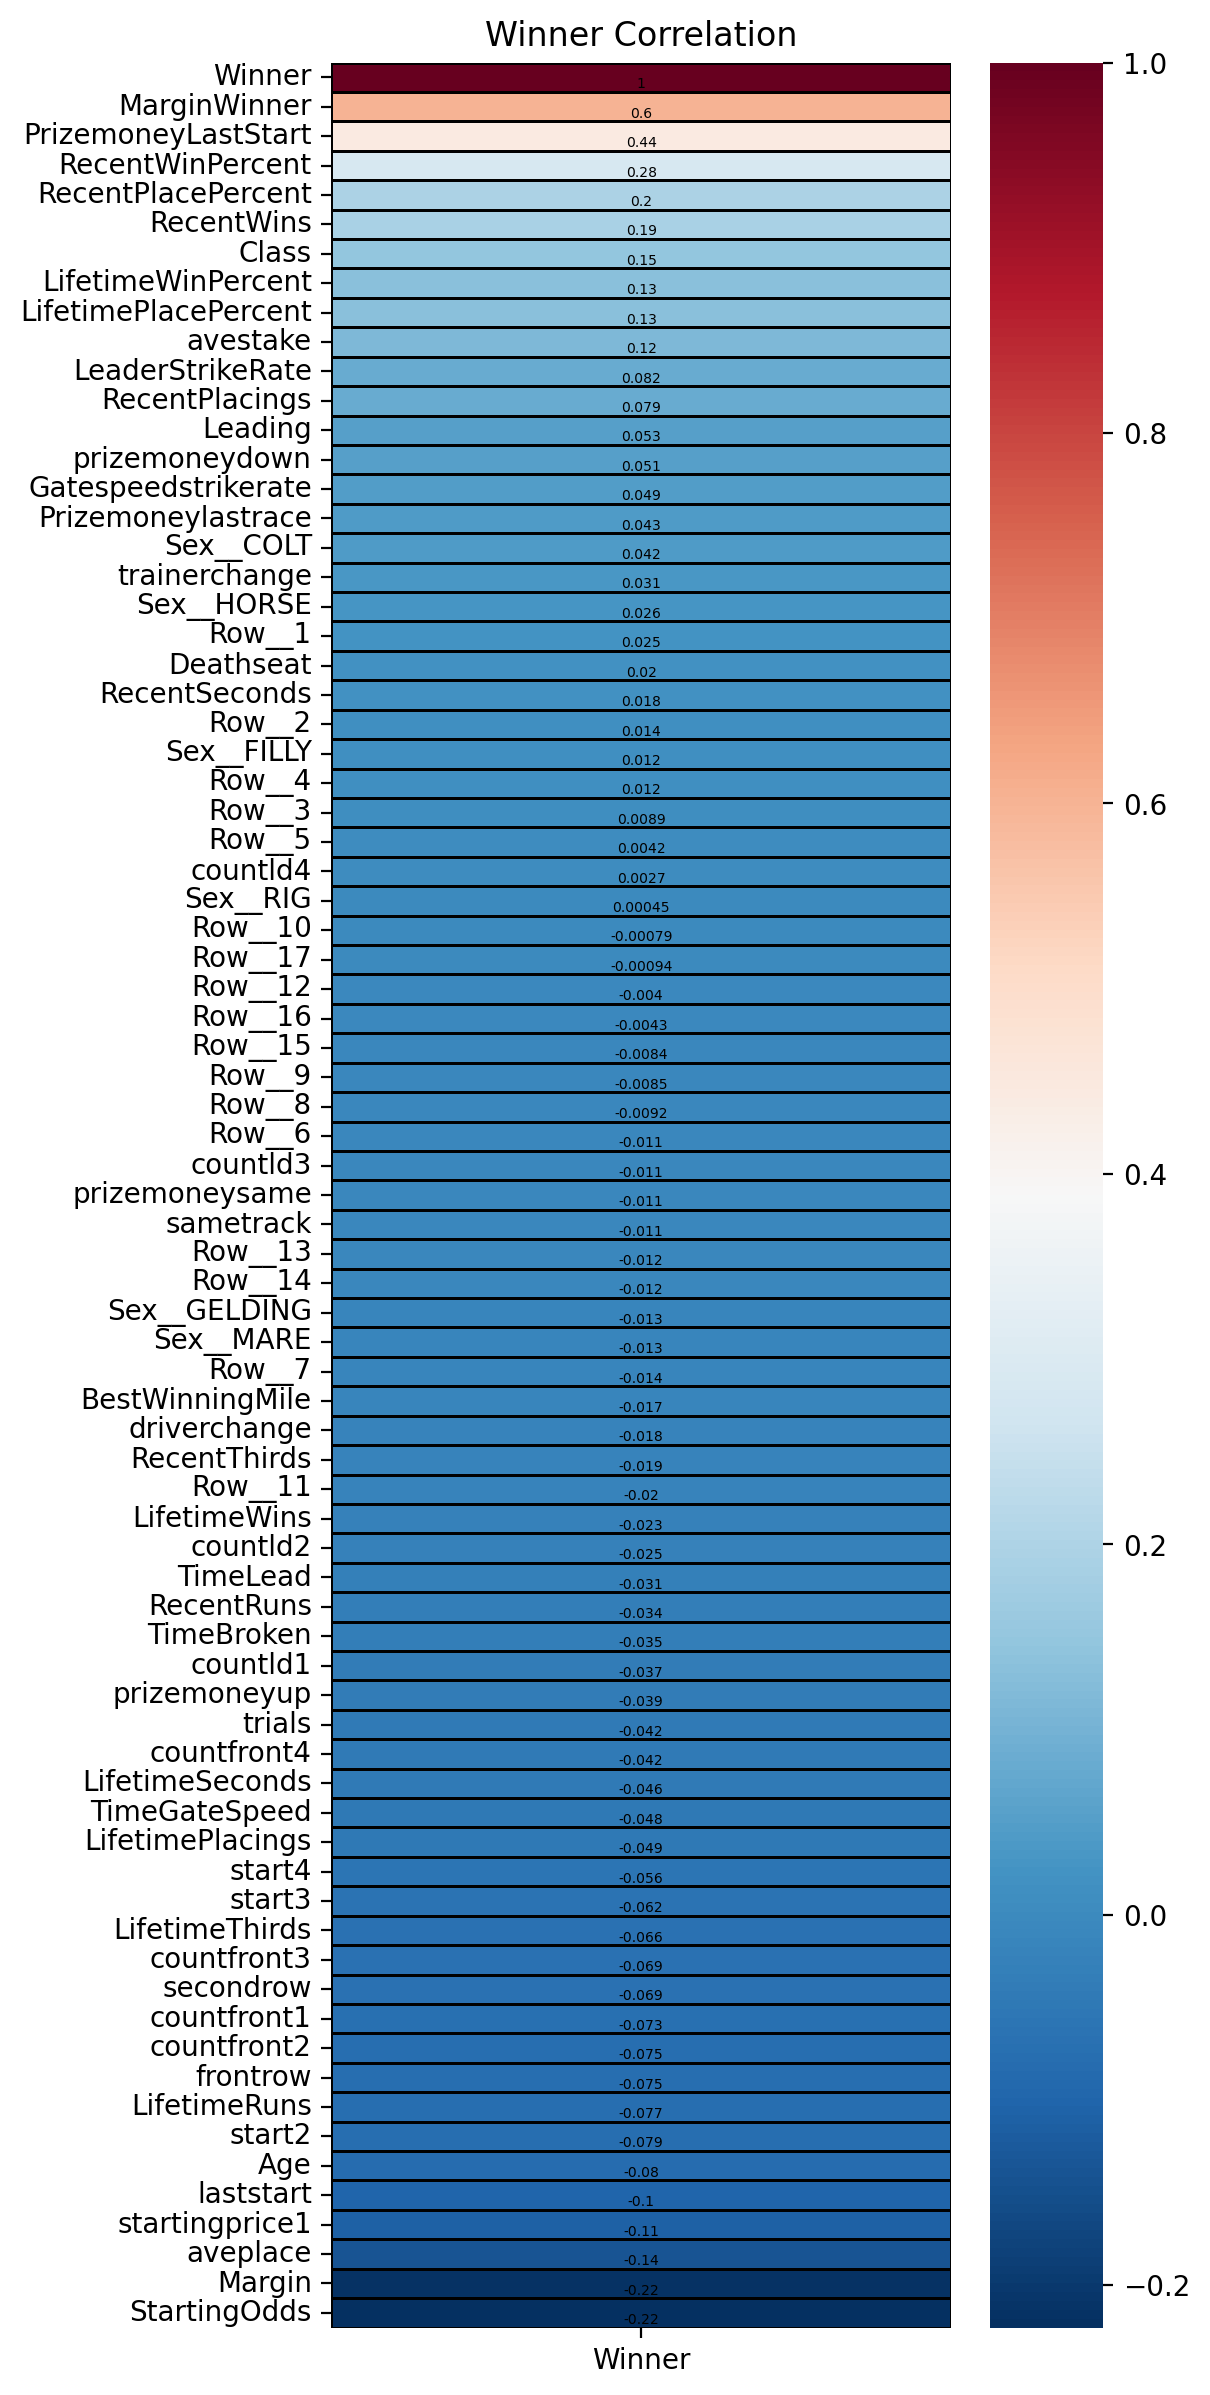

In [9]:
winner = horses.pop('Winner')
horses.insert(0, 'Winner', winner)
corr = horses.corr().sort_values(by='Winner', ascending=False)
winner_corr = corr[['Winner']]
fig, ax = plt.subplots(figsize=(5,15), dpi=200)
annot_kws = {"ha": 'center',"va": 'top', "size":5, "color": "black"}
ax = sns.heatmap(winner_corr, annot=True, vmax=winner_corr.max(), vmin=winner_corr.min(), square=False, cbar=True, cmap='RdBu_r', linewidths=0.5, linecolor='black', annot_kws=annot_kws)
ax.set_title('Winner Correlation')
plt.show()

In [10]:
horses.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144917 entries, 0 to 144916
Data columns (total 77 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Winner                144917 non-null  int64  
 1   Margin                144917 non-null  float64
 2   StartingOdds          144917 non-null  float64
 3   Age                   144917 non-null  int64  
 4   LifetimeRuns          144917 non-null  int64  
 5   RecentRuns            144917 non-null  int64  
 6   LifetimeWins          144917 non-null  int64  
 7   LifetimeSeconds       144917 non-null  int64  
 8   LifetimeThirds        144917 non-null  int64  
 9   LifetimePlacings      144917 non-null  int64  
 10  LifetimeWinPercent    144917 non-null  float64
 11  LifetimePlacePercent  144917 non-null  float64
 12  RecentPlacePercent    144917 non-null  float64
 13  RecentWinPercent      144917 non-null  float64
 14  RecentPlacings        144917 non-null  int64  
 15  

In [11]:
horses.head()

,Winner,Margin,StartingOdds,Age,LifetimeRuns,RecentRuns,LifetimeWins,LifetimeSeconds,LifetimeThirds,LifetimePlacings,LifetimeWinPercent,LifetimePlacePercent,RecentPlacePercent,RecentWinPercent,RecentPlacings,RecentThirds,RecentSeconds,RecentWins,Class,Gatespeedstrikerate,LeaderStrikeRate,laststart,start2,start3,start4,MarginWinner,Leading,Deathseat,driverchange,trainerchange,BestWinningMile,TimeLead,TimeGateSpeed,TimeBroken,PrizemoneyLastStart,Prizemoneylastrace,startingprice1,avestake,sametrack,prizemoneysame,prizemoneyup,prizemoneydown,trials,aveplace,countld1,countld2,countld3,countld4,countfront1,countfront2,countfront3,countfront4,frontrow,secondrow,Row__1,Row__2,Row__3,Row__4,Row__5,Row__6,Row__7,Row__8,Row__9,Row__10,Row__11,Row__12,Row__13,Row__14,Row__15,Row__16,Row__17,Sex__COLT,Sex__FILLY,Sex__GELDING,Sex__HORSE,Sex__MARE,Sex__RIG
0,0,103.8,91.0,6,14,26,0,1,2,3,0.000000,0.214286,0.192308,0.038462,5,1,3,1,50,0.071429,0.000000,8,10,4,6,0.0,1,0,0,0,3252000.0,0,1,1,100,7500,52.70,206.500000,0,1,0,0,9,6.428571,0,0,0,0,1,1,2,0,11,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,24.2,16.0,5,27,12,5,4,3,12,0.185185,0.444444,0.500000,0.166667,6,2,2,2,75,0.555556,0.370370,8,2,1,4,0.0,0,0,1,0,3252000.0,10,15,0,263,6000,2.75,1164.481481,0,0,1,0,2,3.777778,5,3,1,0,2,4,5,0,20,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,96.2,61.0,8,52,2,8,5,2,15,0.153846,0.288462,0.000000,0.000000,0,0,0,0,50,0.288462,0.192308,0,2,0,1,0.0,0,0,0,0,3252000.0,10,15,2,0,0,0.00,713.423077,0,0,0,0,23,5.288462,8,2,0,0,9,10,5,3,41,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0.0,6.5,6,37,10,10,7,3,20,0.270270,0.540541,0.200000,0.100000,2,0,1,1,87,0.108108,0.054054,1,1,2,7,1.7,0,1,1,0,3282000.0,2,4,3,7818,11999,4.80,2454.162162,0,0,1,0,12,3.837838,1,1,0,0,4,11,8,5,36,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,3.9,9.0,9,46,4,6,9,1,16,0.130435,0.347826,0.000000,0.000000,0,0,0,0,83,0.260870,0.173913,2,4,7,8,0.0,1,0,0,0,3492000.0,8,12,0,120,8280,71.00,1932.260870,1,0,1,0,3,4.717391,2,3,3,0,2,5,5,7,37,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [12]:
x = horses.drop(['Winner'], axis=1)
y = horses['Winner']
x = pd.DataFrame(StandardScaler().fit_transform(x), columns=x.columns)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
tr = DecisionTreeRegressor().fit(x_train, y_train)
print(f'Decision Tree: {tr.score(x_test, y_test)*100}%')

Decision Tree: 99.25995512039952%


In [14]:
lr = LogisticRegression(solver='newton-cg').fit(x_train, y_train)
print(f'Logistic Regression: {lr.score(x_test, y_test)*100}%')

Logistic Regression: 98.75448523323213%


In [15]:
svm = SVC(kernel='rbf').fit(x_train, y_train)
print(f'SVM: {svm.score(x_test, y_test)*100}%')

SVM: 99.25821142699421%
